# Logistic Regression: cat or dog?
In this lab you will teach computer to distinguish between images of cats and dogs using Logistic Regression. 
The input dataset consists of 10,000 images manually labeled as ''cats'' and ''dogs''. The original dataset was downloaded from kaggle. 

Download the entire [folder](https://drive.google.com/file/d/1V4pAtGy7VOJQlxM3g8gyDee8h5k7VTSF/view?usp=sharing)  with images and unzip it into your local directory containing input files for this course. Then set the path below to point to this directory.

In [1]:
data_dir = "../../data_ml_2020/cat_dog_data"

## 1. Building the model

### 1.1. Import all the required libraries. 
If you get an import error on `keras`, run one of the next 2 cells to install `keras` in the current Jupyter kernel, and then rerun the import cell. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from PIL import Image
from keras import preprocessing

### 1.2. Load images
First check if the path to the directory is correct:

In [3]:
import os
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir(data_dir))

['new_set', 'new_set.zip', 'test_set', 'training_set']


Next create two lists and fill them with the paths to the corresponding images. 

In [4]:
train_cats_files = []
train_path_cats = data_dir +"/training_set/cats/"
for path in os.listdir(train_path_cats):
    if '.jpg' in path:
        train_cats_files.append(os.path.join(train_path_cats, path))
        
train_dogs_files = []
train_path_dogs = data_dir +"/training_set/dogs/"
for path in os.listdir(train_path_dogs):
    if '.jpg' in path:
        train_dogs_files.append(os.path.join(train_path_dogs, path))
        
len(train_cats_files), len(train_dogs_files)

(4000, 4000)

Now we have the paths to each image in the training set.
We need to convert each image into a numpy array. For this we use the preprocessing module in the `keras` library. 

Sample dog:

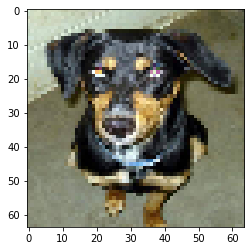

In [85]:
k = 30
d = 64
sample_dog_file = train_dogs_files[k]
img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
img_array = preprocessing.image.img_to_array(img)
plt.imshow(np.uint8(img_array))

Sample cat:

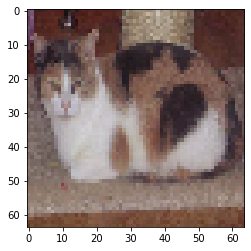

In [89]:
k = 100
d = 64
sample_cat_file = train_cats_files[k]
img = preprocessing.image.load_img(sample_cat_file, target_size=(64, 64))
img_array = preprocessing.image.img_to_array(img)
plt.imshow(np.uint8(img_array))

Each image is represented as a $64*64$ matrix of pixels, and for each pixel we have values of Red, Green, and Blue (RGB): 

In [49]:
img_array.shape

(64, 64, 3)

### 1.3. Images to numpy arrays
Now we create training sets for cats and for dogs and then concatenate 2 sets into a single `X_train` dataset of features.

In [50]:
# image dimensions: using 32x32 pixels just for speed

d = 32
X_train_orig = np.zeros((8000, d, d, 3), dtype='float32')
for i in range(4000):    
    path = train_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
   
    X_train_orig[i] = preprocessing.image.img_to_array(img)

for i in range(4000,8000):    
    path = train_dogs_files[i-4000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    
    X_train_orig[i] = preprocessing.image.img_to_array(img)

X_train_orig.shape

(8000, 32, 32, 3)

### 1.4. Flatten 3D image arrays
Our model requires each object to be a 1D vector of features -
we need to flatten our 3D image arrays.

After reshaping we will have,
$d*d*3$ features as a single array for each picture in the training set (8000 pics),

In [55]:
X_train = X_train_orig.reshape(8000,-1)
print(X_train[0:5])
# Scaling image data
X_train = X_train * (1/255)
print(X_train[0:5])
X_train.shape

[[ 33.  37.  40. ...  50.  35.  30.]
 [ 45.  54.  61. ... 194. 193.   4.]
 [220. 221. 216. ... 215. 212. 207.]
 [124.  98.  63. ...  91.  80.  52.]
 [ 53.  38.  15. ...  23. 150.  95.]]
[[0.12941177 0.14509805 0.15686275 ... 0.19607845 0.13725491 0.11764707]
 [0.1764706  0.21176472 0.2392157  ... 0.7607844  0.7568628  0.01568628]
 [0.86274517 0.86666673 0.8470589  ... 0.8431373  0.8313726  0.8117648 ]
 [0.48627454 0.38431376 0.24705884 ... 0.35686275 0.3137255  0.20392159]
 [0.20784315 0.14901961 0.05882353 ... 0.09019608 0.5882353  0.37254903]]


(8000, 3072)

### 1.5. Create class labels
Now we need to create the corresponding class label vectors. We will mark the cats as class 1, and the dogs as class 0 (not cats).

In [56]:
Y_train_orig = np.ones((4000,)) # 1 - 4000 are cat pictures so our label is 1
Y_train_orig = np.concatenate((Y_train_orig, np.zeros((4000,)))) # 4000 - 8000 are dog pictures so our label is 0
Y_train = Y_train_orig.reshape(-1)
print("At position 3 should be a cat:", Y_train[3])
print("At position 4002 should be a dog:", Y_train[4002])
Y_train.shape

At position 3 should be a cat: 1.0
At position 4002 should be a dog: 0.0


(8000,)

### 1.6. Build the model
We are using the `LogisticRegression` class from `sklearn` package.
<ul>
<li>The <code>random_state</code> parameter tells to shuffle the samples, so the classifier does not see all the cats first, and then the dogs. Specifying  the `random_state` value ensures that the algorithm starts from the same random seed and produces reproducible results.</li> 
<li>The <code>max_iter</code> parameter tells algorithm to stop even if it did not reach the thrreshold for convergence yet.</li>
    <li>In the <code>solver</code> parameter you can specify the algorithm which you want to use.</li>
</ul>

You can read more about the parameters of  `LogisticRegression` model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [71]:
from sklearn import linear_model

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default='lbfgs'
logreg = linear_model.LogisticRegression(solver=algorithms[4], random_state = 42, max_iter= 4000, penalty="elasticnet", C=5, l1_ratio=0.3)
logreg.fit (X_train, Y_train)
acc_train = logreg.score(X_train, Y_train)
print("train accuracy: {}".format(acc_train))

train accuracy: 0.7905


The score of the logistic regression classifier is simply a percentage of correctly predicted data points. This measure is called the **accuracy** of the model.

## 2. Model evaluation 
Obviously, we are much more interested to see how our model performs on the test data. To create a test set, we repeat steps 1.2-1.5 for the test_set folder. We use the same grayscale preprocessing as for the train set.

### 2.1. Load images

In [58]:
test_cats_files = []
test_path_cats = data_dir +"/test_set/cats/"
for path in os.listdir(test_path_cats):
    if '.jpg' in path:
        test_cats_files.append(os.path.join(test_path_cats, path))
        
test_dogs_files = []
test_path_dogs = data_dir +"/test_set/dogs/"
for path in os.listdir(test_path_dogs):
    if '.jpg' in path:
        test_dogs_files.append(os.path.join(test_path_dogs, path))
        
len(test_cats_files), len(test_cats_files)

(1000, 1000)

### 2.2. Images to numpy arrays

In [59]:
X_test_orig = np.zeros((2000, d, d, 3), dtype='float32')  
for i in range(1000):    
    path = test_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)

for i in range(1000,2000):    
    path = test_dogs_files[i-1000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)    

X_test_orig.shape

(2000, 32, 32, 3)

### 2.3. Flatten 3D image arrays

In [60]:
X_test = X_test_orig.reshape(2000,-1)
print(X_test[0:5])
# Scaling image data
X_test = X_test * (1/255)
print(X_test[0:5])
X_test.shape

[[240. 249. 244. ... 185. 194. 201.]
 [120. 115.  96. ...  97.  43.  19.]
 [ 52.  48.  36. ... 154. 135. 129.]
 [127.  92.  70. ... 167. 134. 103.]
 [219. 221. 220. ... 251. 255. 230.]]
[[0.94117653 0.97647065 0.9568628  ... 0.7254902  0.7607844  0.78823537]
 [0.47058827 0.45098042 0.37647063 ... 0.3803922  0.16862746 0.07450981]
 [0.20392159 0.18823531 0.14117648 ... 0.6039216  0.5294118  0.5058824 ]
 [0.49803925 0.36078432 0.27450982 ... 0.654902   0.5254902  0.4039216 ]
 [0.8588236  0.86666673 0.86274517 ... 0.9843138  1.         0.90196085]]


(2000, 3072)

### 2.4. Create class labels

In [61]:
Y_test_orig = np.ones((1000,)) 
Y_test_orig = np.concatenate((Y_test_orig, np.zeros((1000,)))) 
Y_test = Y_test_orig.reshape(-1)
print("At position 3 should be a cat:", Y_test[3])
print("At position 1002 should be a dog:", Y_test[1002])
Y_test.shape

At position 3 should be a cat: 1.0
At position 1002 should be a dog: 0.0


(2000,)

### 2.5. Accuracy for the test set

In [72]:
acc_test = logreg.score(X_test, Y_test)
print("test accuracy: {} ".format(acc_test))

test accuracy: 0.5895 


# 3. Support Vector Machines 
First, watch the [video](https://www.youtube.com/watch?v=efR1C6CvhmE&vl=en) about another classifier: Support Vector Machine (SVM).

Next, perform the cat/dog image classification learning using SVM.
Learn about the parameters of the sklearn SVC class [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [74]:
from sklearn.svm import SVC # "Support vector classifier"

kernel_type = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] # default='rbf'
#svm = SVC(kernel=kernel_type[0], C=1E3, max_iter=5000, random_state=42)
svm = SVC(kernel=kernel_type[2], C=1, random_state=42)

# train the model
svm.fit (X_train, Y_train)

SVC(C=1, random_state=42)

In [75]:
# accuracy of trained data
acc_train = svm.score(X_train, Y_train)
print("train accuracy: {} ".format(acc_train))


# accuracy of test data
acc_test = svm.score(X_test, Y_test)
print("test accuracy: {} ".format(acc_test))

train accuracy: 0.875125 
test accuracy: 0.6755 


## 4. Predict random cats
Find random images of cats and dogs, and test your model to predict them. Follow all the steps to convert two images into an array of features and then predict. I summarrized your images in a dataset [new_set](https://drive.google.com/file/d/1hgcZfOUJ6AtrOfEQXAgO1a_tHo3Ux9-2/view?usp=sharing).

In [76]:
new_cats_files = []
new_path_cats = data_dir +"/new_set/cats/"
for path in os.listdir(new_path_cats):
    if '.jpg' in path:
        new_cats_files.append(os.path.join(new_path_cats, path))
        
new_dogs_files = []
new_path_dogs = data_dir +"/new_set/dogs/"
for path in os.listdir(new_path_dogs):
    if '.jpg' in path:
        new_dogs_files.append(os.path.join(new_path_dogs, path))
        
len(new_cats_files), len(new_dogs_files)

(5, 5)

In [77]:
X_new_orig = np.zeros((10, d, d, 3), dtype='float32')  
for i in range(5):    
    path = new_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_new_orig[i] = preprocessing.image.img_to_array(img)

for i in range(5,10):    
    path = new_dogs_files[i-5]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_new_orig[i] = preprocessing.image.img_to_array(img)    

X_new_orig.shape

(10, 32, 32, 3)

In [79]:
X_new = X_new_orig.reshape(10,-1)
print(X_new[0])
X_new = X_new * (1/255)
print(X_new[0])

[255. 255. 255. ... 255. 255. 255.]
[1. 1. 1. ... 1. 1. 1.]


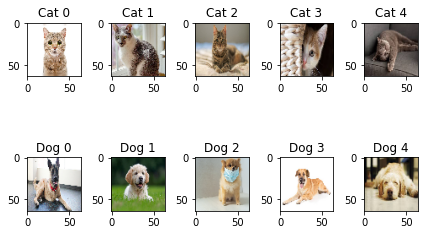

In [80]:
width=10
height=10
rows = 2
cols = 5
axes=[]
fig=plt.figure()

for k in range(cols):
    sample_cat_file = new_cats_files[k]
    axes.append( fig.add_subplot(rows, cols, k+1) )
    subplot_title=("Cat "+str(k))
    axes[-1].set_title(subplot_title)  
    img = preprocessing.image.load_img(sample_cat_file, target_size=(64, 64))
    img_array = preprocessing.image.img_to_array(img)
    plt.imshow(np.uint8(img_array))
    
for k in range(cols):
    sample_dog_file = new_dogs_files[k]
    axes.append( fig.add_subplot(rows, cols, k+5+1) )
    subplot_title=("Dog "+str(k))
    axes[-1].set_title(subplot_title)  
    img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
    img_array = preprocessing.image.img_to_array(img)
    plt.imshow(np.uint8(img_array))
fig.tight_layout()    
plt.show()

In [81]:
# X_new = [[...], [...]]
Y_new = logreg.predict(X_new)
print("Log regression Predictions: ")
print(Y_new)

Y_new = svm.predict(X_new)
print("SVM Predictions: ")
print(Y_new)

Log regression Predictions: 
[1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
SVM Predictions: 
[0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]


## 5. Extracting image features with mahotas

In [82]:
# importing required libraries 
import mahotas 
from pylab import imshow, show 

Dog
Labelled Image


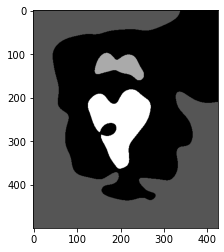

Haralick Features


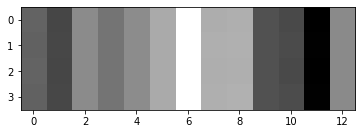

Cat
Labelled Image


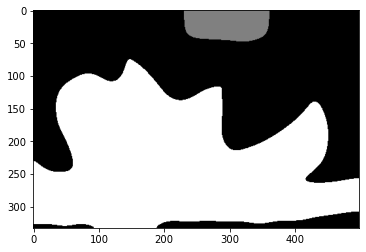

Haralick Features


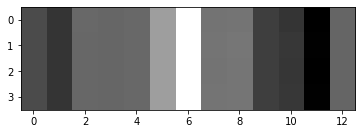

In [90]:
# loading image
sample_dog_file = train_dogs_files[30]
sample_cat_file = train_cats_files[100]
dog_img = mahotas.imread(sample_dog_file) 
cat_img = mahotas.imread(sample_cat_file)    

# filtering the image 
dog_img = dog_img[:, :, 0] 
cat_img = cat_img[:, :, 0]    

# setting gaussian filter 
dog_gaussian = mahotas.gaussian_filter(dog_img, 15)
cat_gaussian = mahotas.gaussian_filter(cat_img, 15) 
   
# setting threshold value 
dog_gaussian = (dog_gaussian > dog_gaussian.mean()) 
cat_gaussian = (cat_gaussian > cat_gaussian.mean()) 

# making it labeled image 
labeled_dog, n = mahotas.label(dog_gaussian) 
labeled_cat, n = mahotas.label(cat_gaussian) 

# showing dog image
print("Dog")
print("Labelled Image") 
imshow(labeled_dog) 
show() 
  
# getting haralick features 
h_features_dog = mahotas.features.haralick(labeled_dog) 
  
# showing the feature 
print("Haralick Features") 
imshow(h_features_dog) 
show() 

# showing cat image
print("Cat")
print("Labelled Image") 
imshow(labeled_cat) 
show() 
  
# getting haralick features 
h_features_cat = mahotas.features.haralick(labeled_cat) 
  
# showing the feature 
print("Haralick Features") 
imshow(h_features_cat) 
show() 

What if we use these features for classification instead of pixel values?

In [92]:
X_train_orig = np.zeros((8000, 4,13), dtype='float32')
for i in range(4000):    
    path = train_cats_files[i]
    img = mahotas.imread(path)
    img = img[:, :, 0]  
    gaussian = mahotas.gaussian_filter(img, 15)
    gaussian = (gaussian > gaussian.mean()) 
    labeled, n = mahotas.label(gaussian) 
    h_features = mahotas.features.haralick(labeled) 
    X_train_orig[i] = h_features

for i in range(4000,8000):    
    path = train_dogs_files[i-4000]
    img = mahotas.imread(path)
    img = img[:, :, 0]  
    gaussian = mahotas.gaussian_filter(img, 15)
    gaussian = (gaussian > gaussian.mean()) 
    labeled, n = mahotas.label(gaussian) 
    h_features = mahotas.features.haralick(labeled) 
    X_train_orig[i] = h_features

X_train_orig.shape

(8000, 4, 13)

In [93]:
X_train = X_train_orig.reshape(8000,-1)
X_train.shape

(8000, 52)

In [94]:
from sklearn import linear_model

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default='lbfgs'
logreg = linear_model.LogisticRegression(solver=algorithms[4], random_state = 42, max_iter= 4000, penalty="elasticnet", C=5, l1_ratio=0.3)
logreg.fit (X_train, Y_train)
acc_train = logreg.score(X_train, Y_train)
print("train accuracy: {}".format(acc_train))

train accuracy: 0.559625


In [95]:
from sklearn.svm import SVC # "Support vector classifier"

kernel_type = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] # default='rbf'
#svm = SVC(kernel=kernel_type[0], C=1E3, max_iter=5000, random_state=42)
svm = SVC(kernel=kernel_type[2], C=1, random_state=42)

# train the model
svm.fit (X_train, Y_train)
# accuracy of trained data
acc_train = svm.score(X_train, Y_train)
print("train accuracy: {} ".format(acc_train))

train accuracy: 0.517875 


### 2.8. Save model to file
When you are happy with the performance of your model and want to use it to identify cats in the future, save it to file using pickle. An example how to save the model and then reload it can be found [here](
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/).

Test that you can save the model and then load it in the cell below. Put your saved model to your google drive folder and provide the link to it in your notebook submission.

SVM is a more powerful classifier than logistic regression. Try to achieve a better accuracy by playing with the algorithm parameters. Report the final values in a new markdown cell below.

Finally, in a newly added markdown cell briefly explain how do you understand the difference between the logistic regression and SVM learning algorithms. Pay a special attention to how these algorithms treat a decision boundary. 

Copyright &copy; 2020 Marina Barsky. All rights reserved.